In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#uploading the csv

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

In [15]:
churn.drop(['CaseOrder','Customer_id','Interaction', 'UID','County','Zip'], axis=1, inplace = True)

In [16]:
from sklearn.preprocessing import OneHotEncoder

#Transforming churn variable to numerical NOT to use in KMeans but to guide feature selection, 
#ie retaining the variable in the data set as a reference
churn['Churn'] = churn['Churn'].astype('category')
churn['Churn01'] = churn['Churn'].cat.codes

# Create an instance of One hot encoder
enc = OneHotEncoder()
  
# Passing encoded columns through One hot encoder
  
churn_enc = pd.DataFrame(enc.fit_transform(
    churn[['Churn01',]]).toarray())
  
# Merge with main
churn_enc= churn.join(churn_enc)

churn.drop(['Churn'],axis=1, inplace=True)


In [17]:
churn=churn.select_dtypes(exclude='object')
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Children              10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Income                10000 non-null  float64
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Tenure                10000 non-null  float64
 11  MonthlyCharge         10000 non-null  float64
 12  Bandwidth_GB_Year     10000 non-null  float64
 13  Item1                 10000 non-null  int64  
 14  Item2                 10000 non-null  int64  
 15  Item3               

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Churn01
Lat,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,-0.007125,...,-0.016949,0.005793,0.005380,-0.003421,0.011015,-0.000464,-0.008726,0.006087,-0.019583,0.009387
Lng,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,-0.005577,...,0.003446,0.024389,0.003024,0.014966,-0.002398,0.001366,-0.008770,0.001601,0.001912,-0.004603
Population,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,...,-0.003902,0.000618,-0.002571,0.001620,-0.008272,0.006970,0.000834,-0.013062,0.008524,-0.008533
Children,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,...,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236,-0.004264
Age,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,...,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193,0.005630
Income,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,...,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740,0.005937
Outage_sec_perweek,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,...,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126,-0.000156
Email,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,...,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857,0.012326
Contacts,-0.002213,0.008118,0.004019,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,...,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615,0.008567
Yearly_equip_failure,-0.007125,-0.005577,-0.004483,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,...,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859,-0.015927


<Axes: >

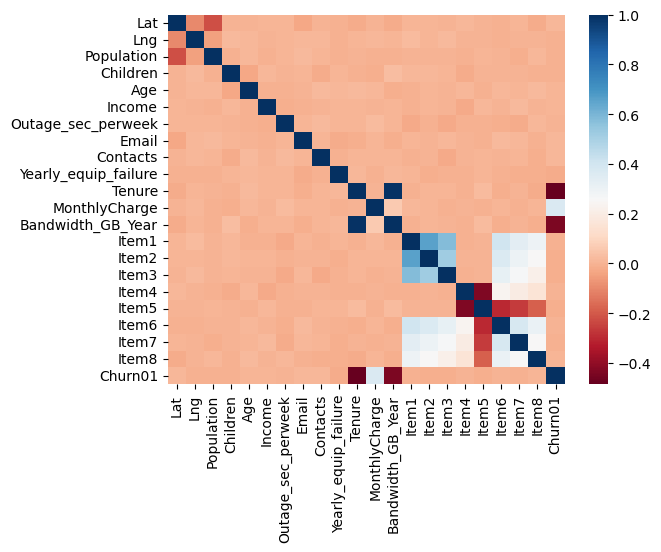

In [18]:
# calculate the correlation matrix
corr = churn.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [19]:
#in order, the most highly correlated features with churn are: tenure, bandwidth gb year, monthlycharge
churn.drop(['Lat','Lng','Population','Children', 'Age', 'Income', 'Outage_sec_perweek','Contacts',
           'Yearly_equip_failure', 'Email', 'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8',
           'Churn01'], axis=1, inplace = True)

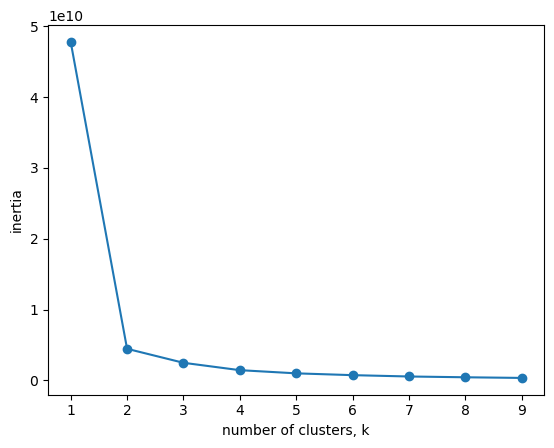

In [20]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(churn)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [21]:
#Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_model = scaler.fit_transform(churn)


# Set the number of clusters
num_clusters =2

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the data to the model
kmeans.fit(scaled_model)

# Add the cluster labels to the DataFrame
churn['cluster'] = kmeans.labels_

In [22]:
# Calculate the average values for each cluster
cluster_analysis = churn.groupby('cluster').mean()

# Print the cluster analysis
print(cluster_analysis)

            Tenure  MonthlyCharge  Bandwidth_GB_Year
cluster                                             
0        59.928772     172.515608        5473.227310
1         9.133764     172.733981        1312.287977


In [23]:
churn['cluster'].value_counts()

1    5001
0    4999
Name: cluster, dtype: int64

In [ ]:
churn.to_csv('churn_cleand212.csv', encoding='utf-8')

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score=silhouette_score(churn, kmeans.labels_)
silhouette_score

0.8059633811987331